<a href="https://colab.research.google.com/github/JoanYego/EDA-in-R/blob/main/Ad_clicks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Research Problem

## Specifying the Research Question

The goal of this analysis is to identify individuals who are most likely to click on a cryptography course advertisement. This project uses R for analysis.

## Defining the Metric for Success

The project will be considered a success when we are able to clean and analyse past data to segment blog users and identify individuals who should be targeted for an advertisement.

## Understanding the Context

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She has employed my services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads. 

## Recording the Exprimental Design

Below are the steps that will be followed in this analysis in order to respond to the research question satisfactorily:

>* Read the Data
>* Check the Data
>* Data Cleaning
>* Univariate Analysis
>* Bivariate Analysis
>* Conclusion and Recommendation


## Data Relevance

The data used for the project was collected from a prior advertisement for a similar course on the same platform. The dataset contains 10 attributes and 1,000 records. These attributes contain descriptive information of past blog users. Some of the attributes include country, age and gender of the user among others.

# Importing Relevant Libraries

In [ ]:
# Installing data.table package
install.packages("data.table", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘R.oo’, ‘R.methodsS3’, ‘RcppCCTZ’, ‘RcppDate’, ‘bit64’, ‘R.utils’, ‘xts’, ‘nanotime’, ‘zoo’




# Reading the Data

In [ ]:
# Reading the data into R from the csv file

library(data.table)
ad <- fread('advertising.csv')
head(ad)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


# Checking the Data

In [ ]:
# Checking the top 6 records 

head(ad)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
# Checking the bottom 6 records

tail(ad)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [ ]:
# Checking the total number of records

nrow(ad)

[1] 1000

In [ ]:
# Checking the data types of each column

str(ad)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked on Ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
# Checking the number of unique values in each column

lengths(lapply(ad, unique))

Daily Time Spent on Site                      Age              Area Income 
                     900                       43                     1000 
    Daily Internet Usage            Ad Topic Line                     City 
                     966                     1000                      969 
                    Male                  Country                Timestamp 
                       2                      237                     1000 
           Clicked on Ad 
                       2

In [ ]:
# Load columns into unique vectors

daily_time_spent <- ad$`Daily Time Spent on Site`
age <- ad$Age
area_income <- ad$`Area Income`
daily_internet_usage <- ad$`Daily Internet Usage`
ad_topic_line <- ad$`Ad Topic Line`
city <- ad$City
gender <- ad$Male
country <- ad$Country
timestamp <- ad$Timestamp
clicked_on_ad <- ad$`Clicked on Ad`

# Data Cleaning

Missing Data

In [ ]:
# Checking the existence of missing values

colSums(is.na(ad))

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

- No missing values in any columns of the dataframe

In [ ]:
na.omit(ad)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0


Outliers

In [ ]:
library(tidyverse)
my_data <- ad %>% select(1,2,3,4,7,10)

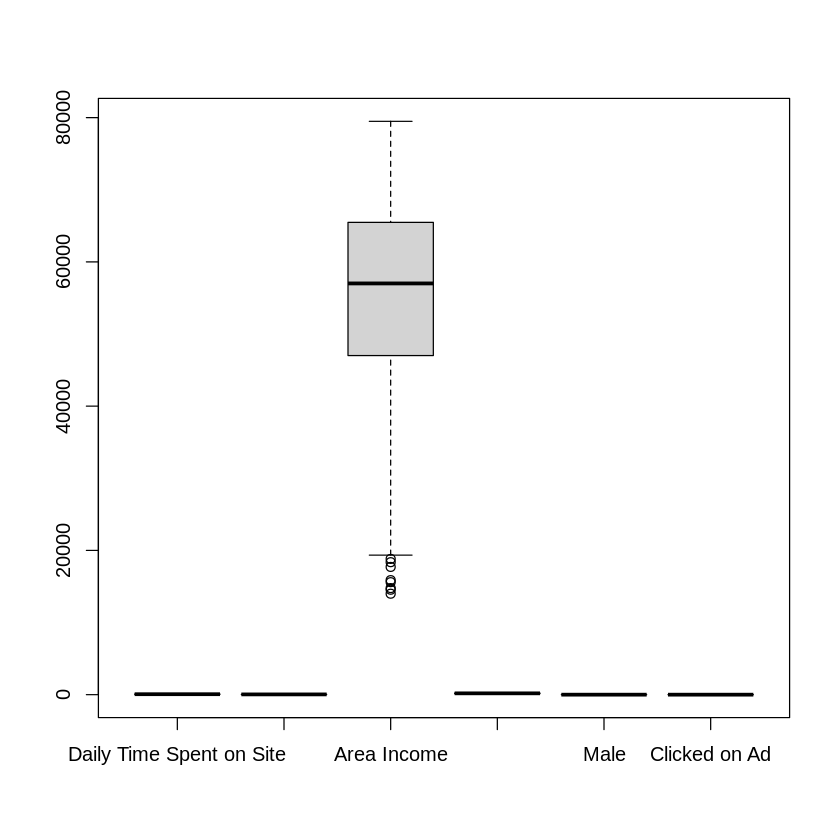

In [ ]:
boxplot(my_data)

In [ ]:
install.packages('reshape2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’





Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


The following objects are masked from ‘package:data.table’:

    dcast, melt


No id variables; using all as measure variables



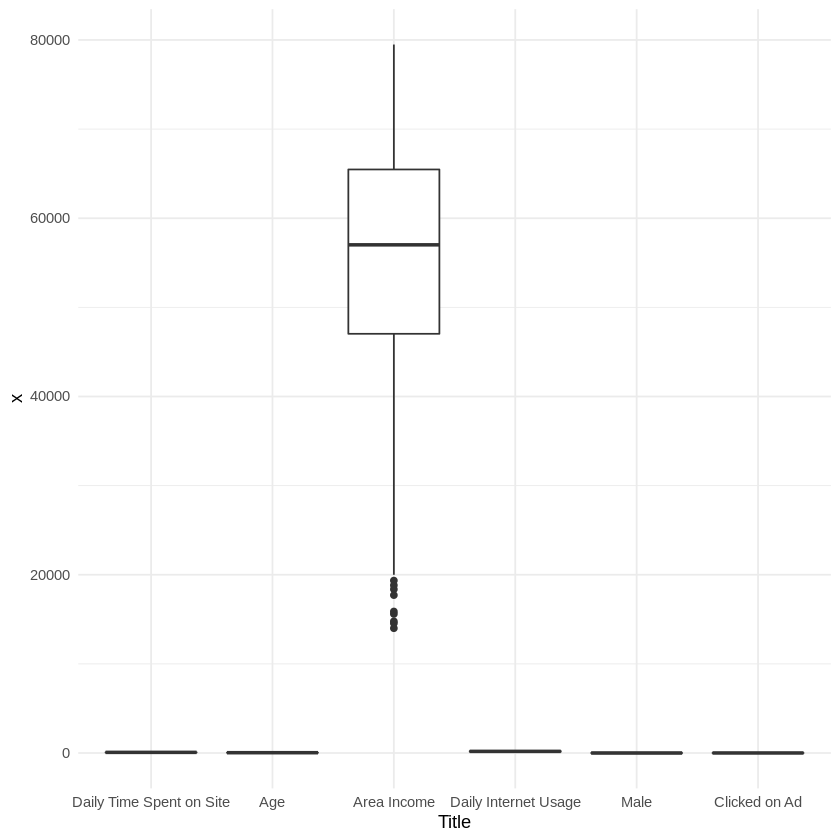

In [ ]:
library(reshape2)
library(ggplot2)

x <- melt(my_data)

plt <- ggplot(data = x, aes(x = variable, y = value))
plt + geom_boxplot() + theme_minimal() + labs(x = "Title", y = "x")

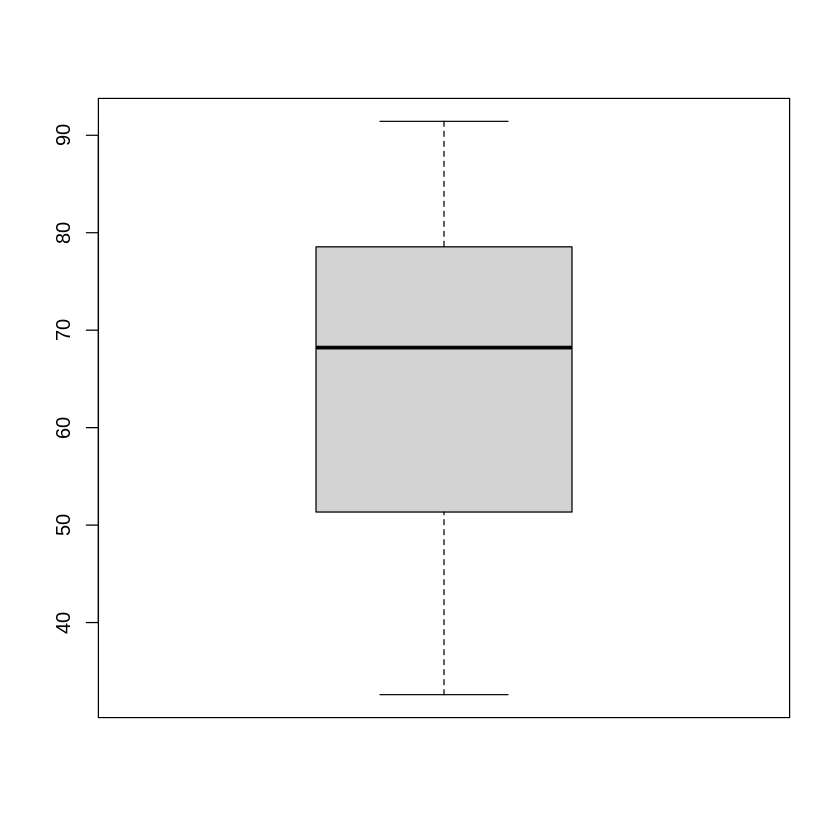

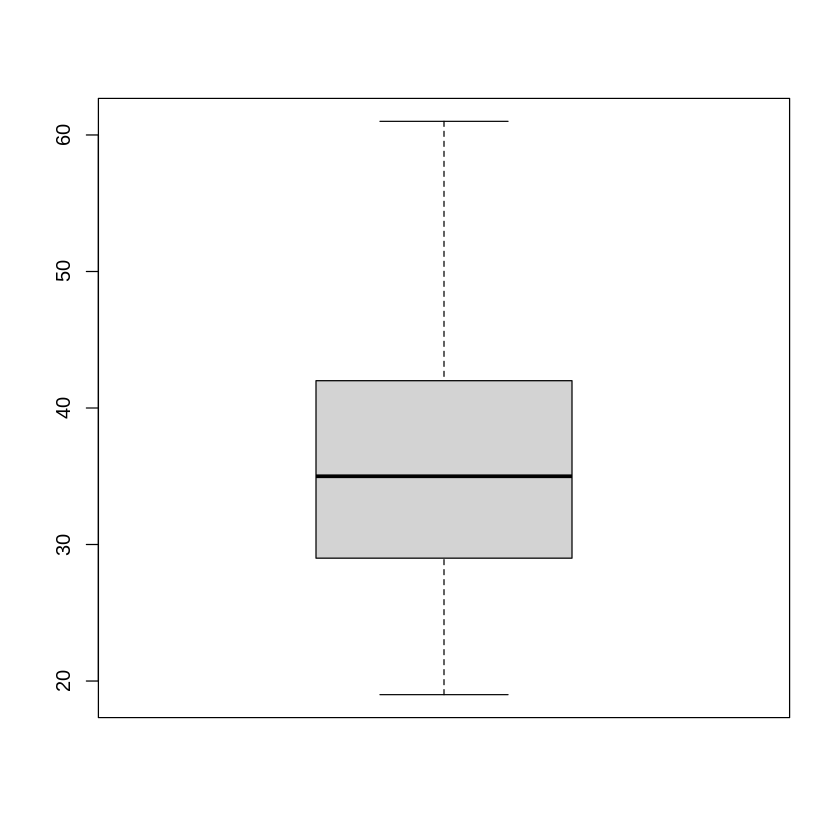

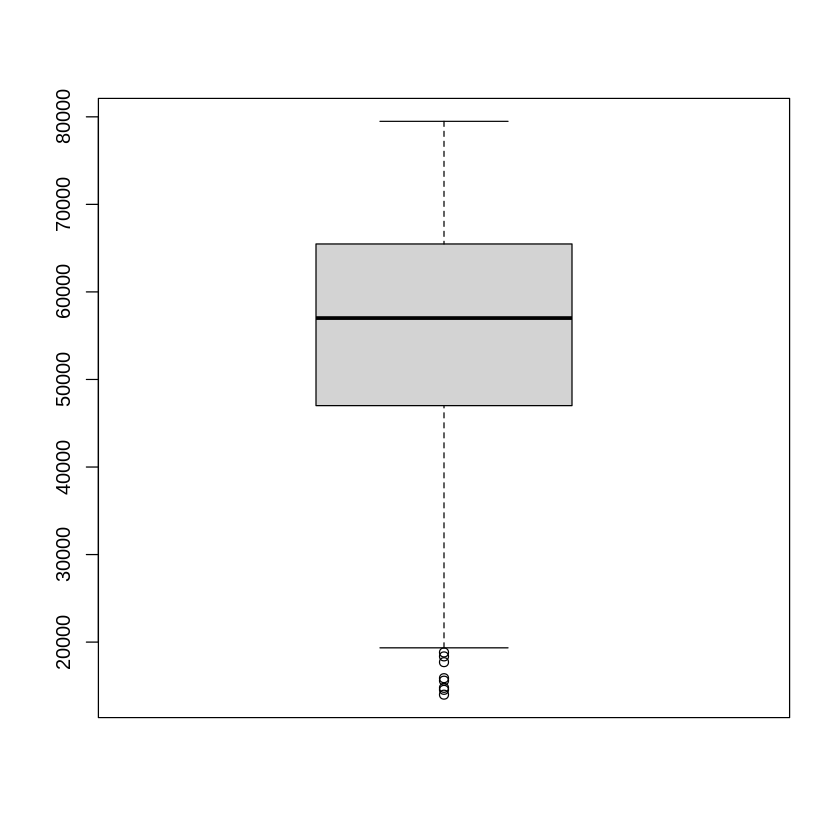

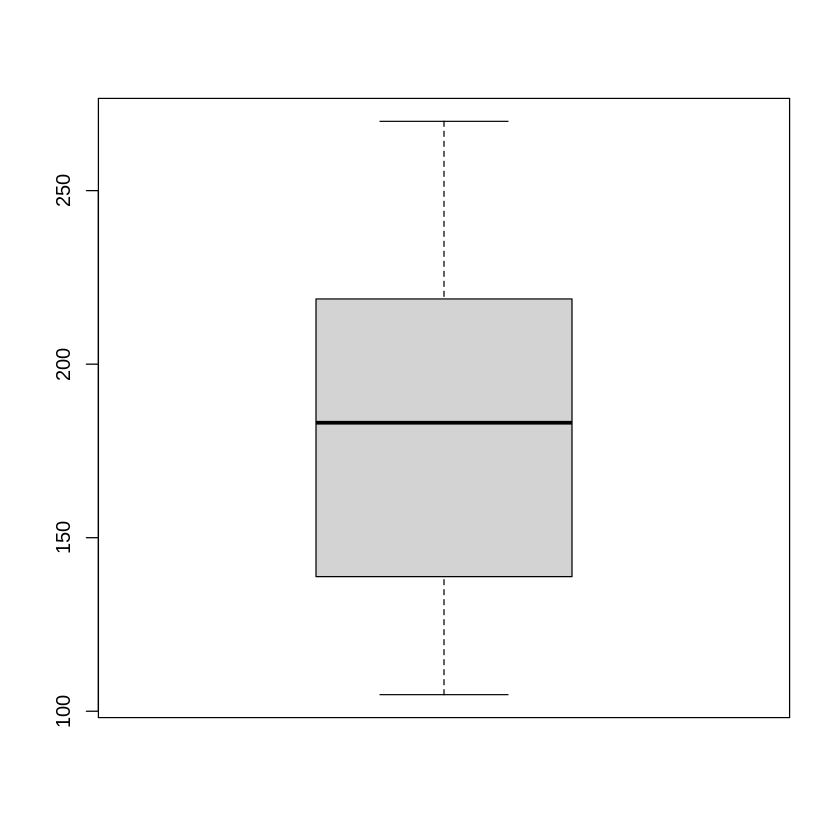

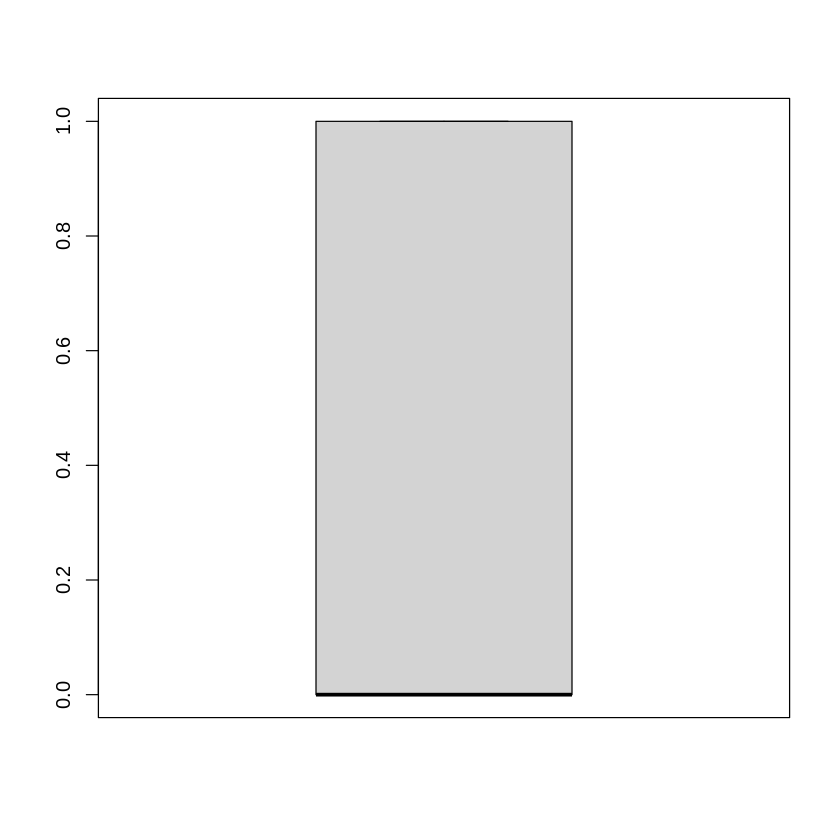

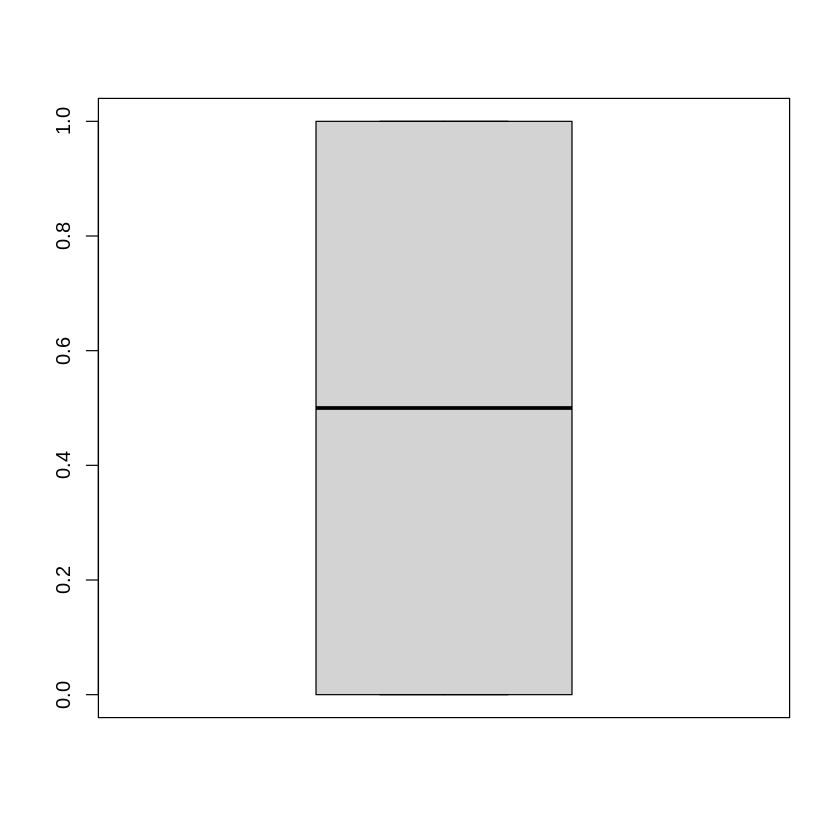

In [ ]:
boxplot(daily_time_spent)
boxplot(age)
boxplot(area_income)
boxplot(daily_internet_usage)
boxplot(gender)
boxplot(clicked_on_ad)

Anomalies

In [ ]:
# Checking for duplicate data

duplicated_rows <- ad[duplicated(ad),]
duplicated_rows

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>


- No duplicate records in the dataset

# Exploratory Data Analysis

## Univariate Analysis

calculating and interpreting measures of central tendency (mode, median, mean) ,select an appropriate measure of dispersion and correctly calculate and interpret the statistic i.e evidence of computing and explaining the range, the interquartile range, the standard deviation, variance, skewness, and kurtosis

In [ ]:
# Means

#my_data[lapply(mean)]
lapply(my_data,FUN=mean)

$`Daily Time Spent on Site`
[1] 65.0002

$Age
[1] 36.009

$`Area Income`
[1] 55000

$`Daily Internet Usage`
[1] 180.0001

$Male
[1] 0.481

$`Clicked on Ad`
[1] 0.5

In [ ]:
# Median

lapply(my_data,FUN=median)

$`Daily Time Spent on Site`
[1] 68.215

$Age
[1] 35

$`Area Income`
[1] 57012.3

$`Daily Internet Usage`
[1] 183.13

$Male
[1] 0

$`Clicked on Ad`
[1] 0.5

In [ ]:
# Mode

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
lapply(my_data,FUN=getmode)

$`Daily Time Spent on Site`
[1] 62.26

$Age
[1] 31

$`Area Income`
[1] 61833.9

$`Daily Internet Usage`
[1] 167.22

$Male
[1] 0

$`Clicked on Ad`
[1] 0

In [ ]:
# Min 
lapply(my_data,FUN=min)


$`Daily Time Spent on Site`
[1] 32.6

$Age
[1] 19

$`Area Income`
[1] 13996.5

$`Daily Internet Usage`
[1] 104.78

$Male
[1] 0

$`Clicked on Ad`
[1] 0

In [ ]:
# Max

lapply(my_data,FUN=max)

$`Daily Time Spent on Site`
[1] 91.43

$Age
[1] 61

$`Area Income`
[1] 79484.8

$`Daily Internet Usage`
[1] 269.96

$Male
[1] 1

$`Clicked on Ad`
[1] 1

In [ ]:
# Range

lapply(my_data,FUN=range)

$`Daily Time Spent on Site`
[1] 32.60 91.43

$Age
[1] 19 61

$`Area Income`
[1] 13996.5 79484.8

$`Daily Internet Usage`
[1] 104.78 269.96

$Male
[1] 0 1

$`Clicked on Ad`
[1] 0 1

In [ ]:
# Quantile

lapply(my_data,FUN=quantile)

$`Daily Time Spent on Site`
     0%     25%     50%     75%    100% 
32.6000 51.3600 68.2150 78.5475 91.4300 

$Age
  0%  25%  50%  75% 100% 
  19   29   35   42   61 

$`Area Income`
      0%      25%      50%      75%     100% 
13996.50 47031.80 57012.30 65470.64 79484.80 

$`Daily Internet Usage`
      0%      25%      50%      75%     100% 
104.7800 138.8300 183.1300 218.7925 269.9600 

$Male
  0%  25%  50%  75% 100% 
   0    0    0    1    1 

$`Clicked on Ad`
  0%  25%  50%  75% 100% 
 0.0  0.0  0.5  1.0  1.0

In [ ]:
# Variance

lapply(my_data,FUN=var)

$`Daily Time Spent on Site`
[1] 251.3371

$Age
[1] 77.18611

$`Area Income`
[1] 179952406

$`Daily Internet Usage`
[1] 1927.415

$Male
[1] 0.2498889

$`Clicked on Ad`
[1] 0.2502503

In [ ]:
# Standard deviation

lapply(my_data,FUN=sd)

$`Daily Time Spent on Site`
[1] 15.85361

$Age
[1] 8.785562

$`Area Income`
[1] 13414.63

$`Daily Internet Usage`
[1] 43.90234

$Male
[1] 0.4998889

$`Clicked on Ad`
[1] 0.5002502

- skewness and kurtosis

In [ ]:
install.packages('cowplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



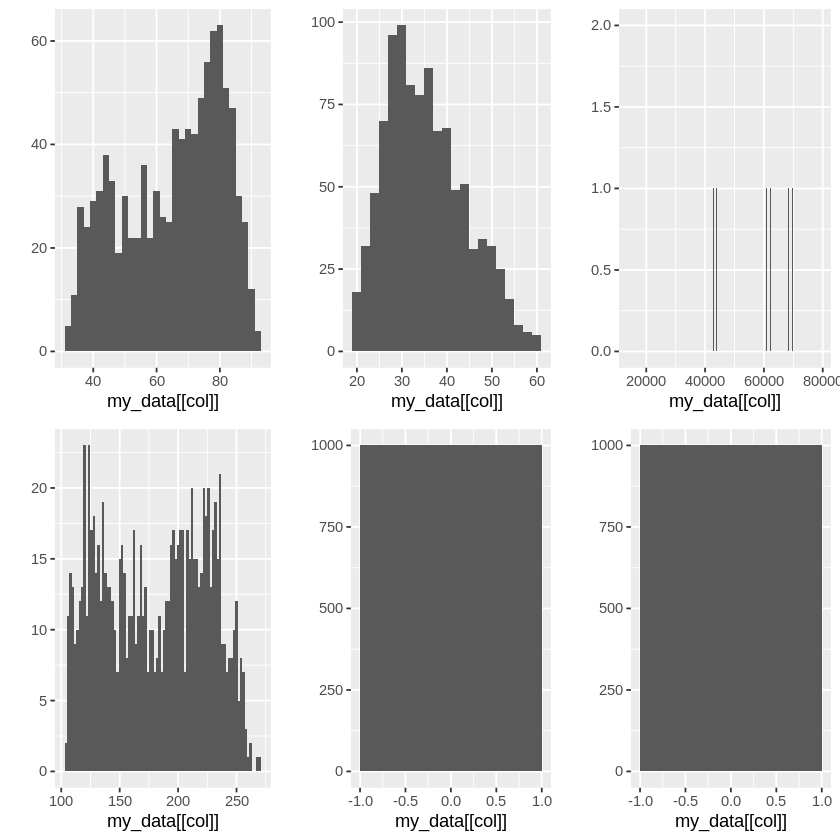

In [ ]:
# Histograms
library(cowplot)
list <-lapply(1:ncol(my_data),
              function(col) ggplot2::qplot(my_data[[col]],
                                           geom = "histogram",
                                           binwidth = 2))

cowplot::plot_grid(plotlist = list)

No id variables; using all as measure variables



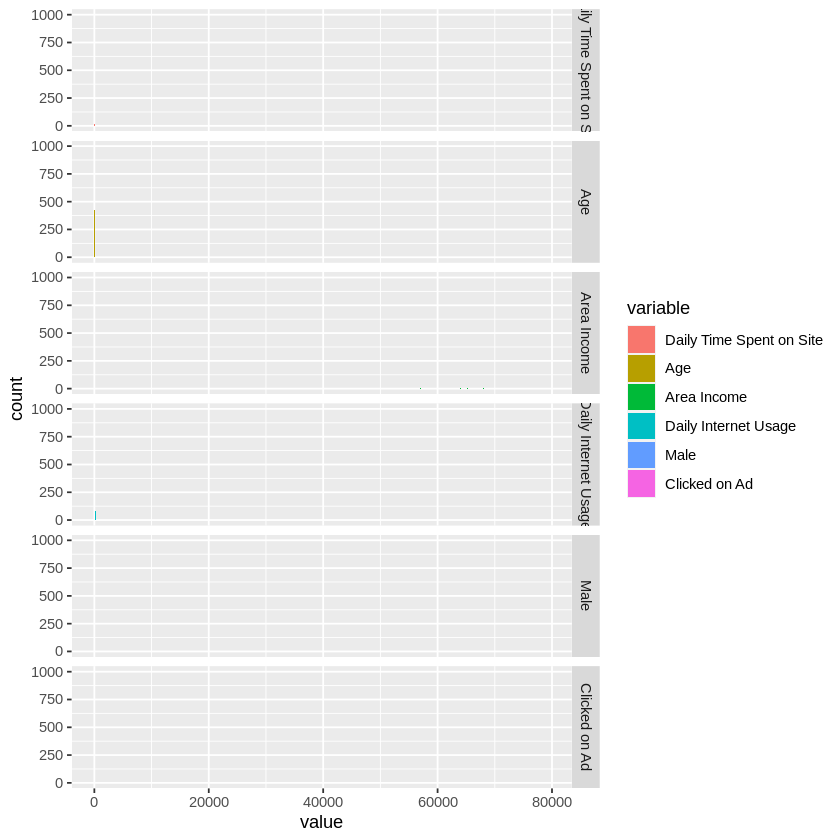

In [ ]:
library(reshape2)
library(ggplot2)
gg <- melt(my_data)
ggplot(gg, aes(x=value, fill=variable)) +
  geom_histogram(binwidth=10)+
  facet_grid(variable~.)

## Bivariate Analysis

creating relevant visualizations i.e. scatter plots, correlation matrix etc. to determine the relationship between variables and computing and interpreting the Pearson correlation coefficient. They go a step further to provide recommendations for effectively performing bivariate analysis while working on the current problem.

# Conclusion and Recommendation